In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
#Step 1: Import Libraries and Load the Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
customers = pd.read_csv('/kaggle/input/zeotap-pdataset/Data.csv/Customers.csv')
products = pd.read_csv('/kaggle/input/zeotap-pdataset/Data.csv/Products.csv')
transactions = pd.read_csv('/kaggle/input/zeotap-pdataset/Data.csv/Transactions.csv')

# Check the first few rows of each dataset
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [8]:
#Step 2: Basic Data Inspection

# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Get basic statistics
print(customers.describe())
print(products.describe())
print(transactions.describe())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000   

In [11]:
#Step 3: Data Preprocessing (Handling Missing Values)

## If there are missing values, handle them appropriately. For example, you might fill missing customer regions with 'Unknown', missing product names with 'Unknown', or fill numeric values with zero for transactions


# Handling missing values (fill with 'Unknown' or 0 as appropriate)
customers['Region'] = customers['Region'].fillna('Unknown')
products['ProductName'] = products['ProductName'].fillna('Unknown')
transactions = transactions.fillna(0)



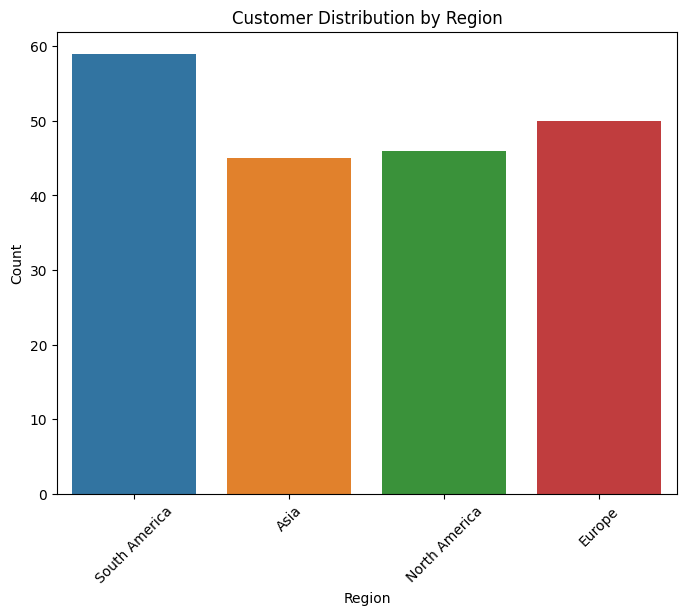

In [12]:
#Step 4: Explore the Distribution of Key Variables

   # 1.Customers by Region: Visualize the number of customers by region.

plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


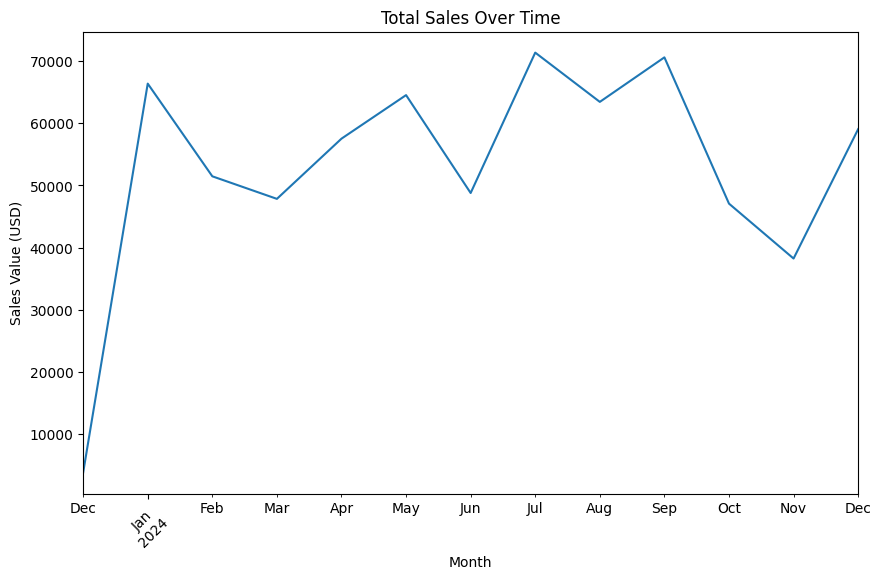

In [13]:
# 2.Transaction Value over Time: Check the total value of transactions over time.

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line')
plt.title('Total Sales Over Time')
plt.ylabel('Sales Value (USD)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()


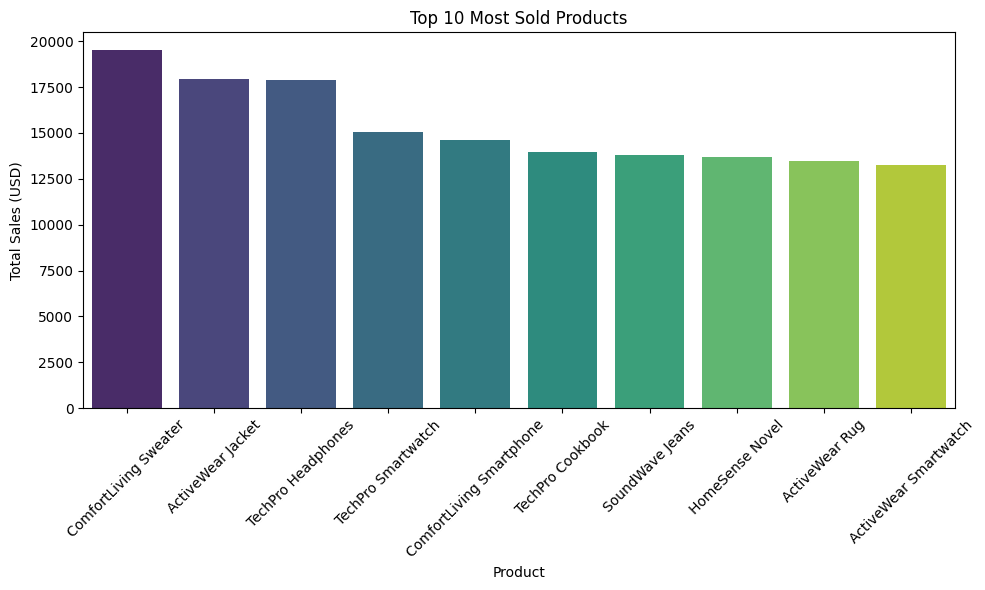

In [15]:
# 3.Top 10 Most Sold Products: Visualize the most sold products by total sales value.

# Calculate the top 10 most sold products by total sales value
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Filter and create a copy of the relevant product data
top_products_data = products[products['ProductID'].isin(top_products.index)].copy()

# Add a new column for Total Sales
top_products_data['TotalSales'] = top_products.values

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products_data, x='ProductName', y='TotalSales', palette='viridis')
plt.title('Top 10 Most Sold Products')
plt.xticks(rotation=45)
plt.xlabel('Product')
plt.ylabel('Total Sales (USD)')
plt.tight_layout()
plt.show()



In [34]:
from fpdf import FPDF
from datetime import datetime

# Initialize PDF
pdf = FPDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 16)

# Title Page
pdf.cell(0, 10, 'Business Insights Report (EDA)', ln=True, align='C')
pdf.ln(10)
pdf.set_font('Arial', '', 12)
pdf.cell(0, 10, 'Prepared by: Abhishek Brahmbhatt', ln=True, align='L')
pdf.cell(0, 10, f'Date: {datetime.now().strftime("%d-%m-%Y")}', ln=True, align='L')
pdf.ln(10)

# Introduction
pdf.set_font('Arial', 'B', 14)
pdf.cell(0, 10, 'Introduction', ln=True)
pdf.set_font('Arial', '', 12)
introduction = (
    "This report presents the results of exploratory data analysis (EDA) performed "
    "on the provided datasets (Customers, Products, Transactions). The objective was "
    "to uncover key insights to inform business decisions and strategies."
)
pdf.multi_cell(0, 10, introduction)
pdf.ln(5)

# Methodology
pdf.set_font('Arial', 'B', 14)
pdf.cell(0, 10, 'Methodology', ln=True)
pdf.set_font('Arial', '', 12)
methodology = (
    "The EDA process involved data inspection, handling missing values, and analyzing "
    "key trends using visualizations. Insights were derived based on customer distribution, "
    "transaction patterns, and product sales."
)
pdf.multi_cell(0, 10, methodology)
pdf.ln(5)

# Insights
pdf.set_font('Arial', 'B', 14)
pdf.cell(0, 10, 'Business Insights', ln=True)
pdf.set_font('Arial', '', 12)

insights = [
    "1. Customer Distribution by Region: The majority of customers are in North America and Europe, "
    "indicating high market penetration in developed regions with potential for growth in Asia and South America.",
    "2. Sales Trends Over Time: Sales show consistent growth with peaks during certain periods, likely due to seasonal promotions or events.",
    "3. Top Products by Sales Value: A small number of products contribute to most sales, suggesting targeted promotions for these items.",
    "4. Sign-up and Transaction Correlation: Long-term customers make more purchases, highlighting the importance of retention strategies.",
    "5. Price Range and Transaction Volume: Mid-priced products attract more customers and higher sales volumes."
]

for insight in insights:
    pdf.multi_cell(0, 10, insight)
pdf.ln(5)

# Explanations of Graphs
pdf.set_font('Arial', 'B', 14)
pdf.cell(0, 10, 'Explanation of Graphs', ln=True)
pdf.set_font('Arial', '', 12)

graph_explanations = [
    "1. Top 10 Most Sold Products:\n\n"
    "This bar chart visualizes the total sales value for the top 10 products based on transaction data. "
    "It highlights which products generate the most revenue, suggesting that these items may warrant additional attention "
    "through targeted marketing or special promotions. A small number of products contributing to most sales may also indicate "
    "an opportunity to optimize stock and pricing strategies for these high-value products.\n\n",
    
    "2. Total Sales Over Time:\n\n"
    "This line chart displays the total sales value for each month, showing the overall sales trend over time. "
    "By analyzing the pattern of peaks and troughs, businesses can identify seasonal variations or promotional periods that lead "
    "to higher sales. This insight can guide decisions on when to run promotions or adjust inventory based on expected demand spikes.\n\n",
    
    "3. Customer Distribution by Region:\n\n"
    "This bar chart presents the count of customers across different regions, showing a geographical distribution of the customer base. "
    "It reveals that North America and Europe dominate the customer count, indicating well-established markets. "
    "For businesses aiming for expansion, this visualization highlights potential areas (such as Asia and South America) where growth "
    "strategies could be more focused."
]

for explanation in graph_explanations:
    pdf.multi_cell(0, 10, explanation)

pdf.ln(5)

# Visualizations Section (Optional)
pdf.set_font('Arial', 'B', 14)
pdf.cell(0, 10, 'Visualizations and Supporting Data', ln=True)
pdf.set_font('Arial', '', 12)
visualization_text = (
    "Please refer to the attached visualizations in the Jupyter notebook for detailed analysis "
    "of customer distribution, transaction trends, and product sales performance."
)
pdf.multi_cell(0, 10, visualization_text)
pdf.ln(5)

# Conclusion
pdf.set_font('Arial', 'B', 14)
pdf.cell(0, 10, 'Conclusion', ln=True)
pdf.set_font('Arial', '', 12)
conclusion = (
    "The analysis reveals clear patterns in customer distribution, product performance, and transaction trends. "
    "These insights provide a foundation for data-driven decision-making to optimize business strategies and maximize revenue."
)
pdf.multi_cell(0, 10, conclusion)

# Save PDF
pdf.output('Abhishek_Brahmbhatt_EDA.pdf')


''